In [3]:
import pandas as pd
import sklearn

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
iris = load_iris()

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Q. should i perform scaling while implenting decison tree?


Not required 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=26)

In [9]:
model = DecisionTreeClassifier() #craeting model with default hyper parameter values

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [13]:
DecisionTreeClassifier #Check attributes

sklearn.tree._classes.DecisionTreeClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {
    'max_depth':[3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3]
}

In [16]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid, cv= 5)

In [17]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [18]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [19]:
model2 = DecisionTreeClassifier(max_depth= 3, min_samples_leaf =  1, min_samples_split = 2)

In [20]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
accuracy_score(y_test,model2.predict(X_test))

0.9777777777777777

In [22]:
model.get_depth()

6

[Text(0.3, 0.9285714285714286, 'X[3] <= 0.75\ngini = 0.666\nsamples = 105\nvalue = [36, 35, 34]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.4, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.224\nsamples = 39\nvalue = [0, 5, 34]'),
 Text(0.2, 0.5, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3, 0.35714285714285715, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.21428571428571427, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\ns

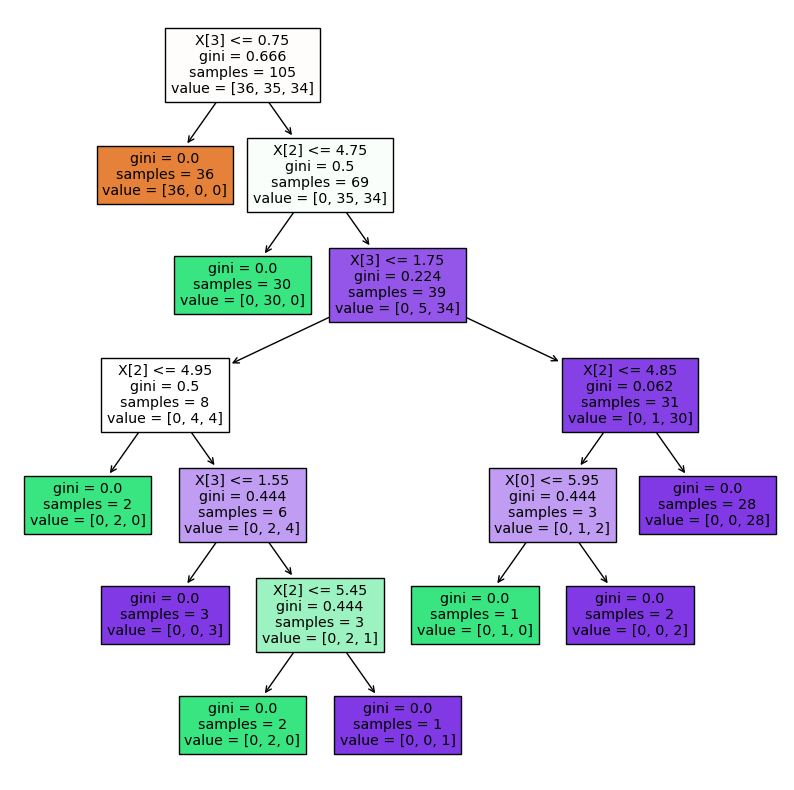

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize =(10,10))
tree.plot_tree(model, filled = True)

[Text(0.3333333333333333, 0.875, 'X[3] <= 0.75\ngini = 0.666\nsamples = 105\nvalue = [36, 35, 34]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.375, 'X[3] <= 1.75\ngini = 0.224\nsamples = 39\nvalue = [0, 5, 34]'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

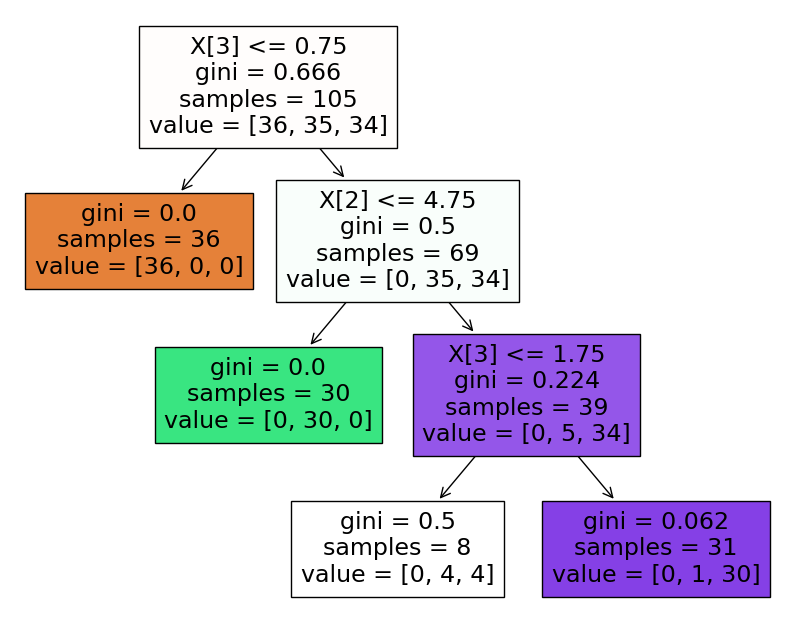

In [33]:
plt.figure(figsize =(10,8))
tree.plot_tree(model2, filled = True)

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [25]:
X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=15)

In [27]:
prediction = cross_val_score(regressor, X, y, cv = 10,)

In [28]:
sum(prediction)/len(prediction)

-0.23681283363624464

The cross_val_score function from scikit-learn returns a score based on the scoring parameter that you pass to it. By default, if you don't specify a scoring parameter, it will return an accuracy score for classification problems and an R-squared score for regression problems. However, you can pass other scoring parameters to get other types of scores.